In [2]:
from IPython import get_ipython
ipython = get_ipython()
ipython.magic('load_ext autoreload')
ipython.magic('autoreload 2')


import logging
logging.basicConfig(level=logging.INFO)
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import pickle as pkl
import sys
sys.path.append('/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/bio_utils')
sys.path.append('/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo')
from task_utils import parallel_tasks_run_def
from deephd_core import read_homo_pdb_coords
import scipy.spatial.distance as sdst



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# path_idx = '/home/ar/data/bioinformatics/deepdocking_experiments/homodimers/raw/idx.txt'
path_idx = '/mnt/data2t2/data/annaha/idx-okl_cb_val0_sh_fix.txt'
wdir = os.path.dirname(path_idx)
data_idx = pd.read_csv(path_idx)
paths_pdb = [os.path.join(wdir, f'{x[0:12]}_raw.pdb') for x in data_idx['path']]
logging.info(f'\n#PDBs = {len(paths_pdb)}')
print(paths_pdb[0])


INFO:root:
#PDBs = 2644


/mnt/data2t2/data/annaha/pdb_raw/1jzk_raw.pdb


In [25]:
def prepare_and_dump_matrices(path_pdb, num_models=2):
    path_out = os.path.splitext(path_pdb)[0] + '6tr_dumpl.pkl'
#     if os.path.isfile(path_out):
#         logging.warning('\t*** output exist, skip... [{}]'.format(path_out))
#         return True
    try:
        pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
    except Exception as err:
        logging.exception('\t!!!! cant process PDB, skip... err=[{}], [{}]'
                          .format(err, path_pdb))
        return False
    if (num_models is None) or (pdb_info['num'] == num_models):
        with open(path_out, 'wb') as f:
            pkl.dump(pdb_info, f)
        return True
    else:
        logging.warning('\t!!! skip PDB, #models != {}, #models={}, pfb={}'
                        .format(num_models, pdb_info['num'], path_pdb))
        return False


In [26]:
task_data = [[x] for x in paths_pdb]
ret = parallel_tasks_run_def(prepare_and_dump_matrices, task_data, num_workers=16)


INFO:root::: start (unnamed-task) #data/#threads = 2644/16, use-process(True)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2394.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2437.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2480.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2544.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2140.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2155.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1662.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5702.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6591.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3490.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1663.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5745.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2292.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6678.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1670.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4291.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3kuw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4984.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4fer_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5098.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5193.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5579.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1728.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1783.
  PDBConstructionWarning,


calc
calc


INFO:root:	[0/2644] (l1) (unnamed-task)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4080.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4082.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4234.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15368.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15414.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15456.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16702.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2320.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2350.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2vc1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7217.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6dlx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9179.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3341.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3361.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3368.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3405.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2748.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2801.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2854.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2914.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3788.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3808.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3828.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3940.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5464.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5596.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5721.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3466.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5760.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3496.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5810.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5838.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3880.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5868.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5869.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5870.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5871.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5873.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5874.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5875.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5878.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5933.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6013.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6029.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6048.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6105.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5166.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3516.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3576.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3636.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3738.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2130.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2196.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3706.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4556.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3710.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4639.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3714.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5frt_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5173.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11896.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11916.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12191.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10236.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10242.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10248.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10523.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6780.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7059.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2339.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2388.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3794.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3923.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2441.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7692.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7716.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7718.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6584.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6626.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6864.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4649.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4704.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4251.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4277.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6g7a_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3552.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3593.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3769.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3436.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3437.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3438.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3582.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2545.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2699.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2740.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8554.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8702.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8978.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3172.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3t7m_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3289.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qj9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3379.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3391.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3403.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3423.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3443.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3666.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3419.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3445.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3471.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3746.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3991.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3583.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8079.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8092.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8196.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6739.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3150.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3152.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3158.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6773.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3igr_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6828.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6e4b_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1593.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5672.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5712.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5148.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5264.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4292.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3189.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4293.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14076.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3214.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1590.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4ops_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1630.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/d

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4889.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4911.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4927.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5721.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6324.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6339.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4rd9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4094.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14676.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4x06_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2464.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2719.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2882.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2468.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2fa1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13125.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13226.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13326.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13476.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4ctz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = rea

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1611.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1629.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1677.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1751.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4521.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2627.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2649.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6025.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6052.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6083.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6235.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10286.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4016.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10288.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4114.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4214.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5w7h_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3272.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3559.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3498.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3599.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3639.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3717.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3479.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3503.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3693.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4043.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2472.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2474.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2475.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2476.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14131.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14309.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14722.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6fks_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6011.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6016.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6021.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6497.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5330.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5374.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5418.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5611.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4476.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4510.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4544.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3731.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4602.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3753.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3763.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3911.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10320.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10530.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3sxy_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arra

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3193.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3228.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4hbe_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14027.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14059.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14091.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14819.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4986.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5092.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6026.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5205.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6138.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5936.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5998.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2667.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2739.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2875.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4270.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4295.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4321.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4378.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6894.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7114.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7334.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7400.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5hyi_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5152.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7215.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2169.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7282.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7348.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7684.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5588.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5589.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5590.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5719.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5507.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5522.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5537.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5544.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4429.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3573.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4698.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6dm3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8294.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8382.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8505.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4rgb_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3612.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12455.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3617.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3624.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 4244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4271.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 4325.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4zqh_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3855.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3904.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2338.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6812.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6924.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2347.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2365.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7476.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2430.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10450.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10738.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11316.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2213.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2235.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4044.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2262.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2304.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4046.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4100.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4159.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4429.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5744.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5756.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5786.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6157.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6472.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13039.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6496.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13140.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6739.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2nva_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4822.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5870.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6005.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5474.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5114.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5152.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5245.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6a8b_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3394.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3408.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3422.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3513.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9765.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9774.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9783.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2180.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2184.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10138.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2486.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2555.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6081.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6122.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6476.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1705.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1729.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1789.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1915.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3el5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3307.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3467.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6881.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6925.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7253.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6329.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6334.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6339.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6354.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6369.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6842.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2dkj_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1817.
  PDBConstructionWarning,


calc


INFO:root:	[265/2644] (l1) (unnamed-task)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1929.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3991.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4000.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4014.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4028.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4040.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3321.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3326.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3397.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5dvo_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9055.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9058.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9061.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9099.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2592.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2607.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ckn_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6463.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6583.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6673.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6893.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4no4_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2597.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2658.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2842.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4455.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4510.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5801.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4205.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2238.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4236.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4267.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2244.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6f5w_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3248.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3256.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3264.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3474.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3688.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4251.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4289.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4308.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4411.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3wj5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4913.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5783.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4185.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5844.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3801.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3821.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3841.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4135.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4utw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3887.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2530.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3905.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3923.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2738.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2f6x_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5387.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5030.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5090.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6221.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7688.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4lrw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1711.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1800.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6373.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5868.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2gqd_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5556.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5589.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5629.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2968.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3270.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3372.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3660.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3qih_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5053.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6724.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6748.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16061.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16080.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4106.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4313.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16579.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4yv5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9057.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2679.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2689.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9333.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2699.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3631.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3661.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3762.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1605.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1613.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1670.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5413.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5707.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5964.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6345.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1239.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1327.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1359.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1379.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12018.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12044.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12070.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12155.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6cut_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arra

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4826.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4894.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5977.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5070.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5979.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5981.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6034.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6087.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5359.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5382.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5397.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13959.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6226.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14075.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5677.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14193.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14685.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10004.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6228.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10039.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6239.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10074.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1817.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10274.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6333.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3169.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3186.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3187.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3346.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9019.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5347.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5359.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5374.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5467.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2y7r_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3208.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4265.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3306.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4515.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3ban_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4131.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4293.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1sr7_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6781.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6880.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6979.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6772.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6792.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6936.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5456.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5560.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5645.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8874.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5724.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9211.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4b5p_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2745.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3504.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3535.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3650.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5418.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5430.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5832.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5440.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5862.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2478.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3225.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3300.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qje_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7189.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7218.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3584.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2543.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7264.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2547.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3594.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1l8l_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2551.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2854.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3199.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3254.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2039.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2044.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2054.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2057.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2533.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5300.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2583.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5451.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4994.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5124.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5401.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2olp_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1888.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1997.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3052.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3068.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3317.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5039.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2602.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2951.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3025.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3104.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3887.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3958.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4029.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4274.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5933.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6142.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3216.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3238.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3331.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qjd_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9689.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10019.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3394.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3431.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4343.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4562.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6939.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6947.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7297.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1591.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1592.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1593.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1651.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10187.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10225.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10269.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10414.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1756.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConst

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3179.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3257.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3063.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3075.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3087.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3222.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5wph_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1673.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1685.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1772.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5569.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5579.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5589.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5623.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1vz6_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3412.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3416.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3420.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3536.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4eci_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5442.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5449.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5456.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4269.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5809.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4276.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4005.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6505.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6563.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6918.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4997.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5122.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5259.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5568.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2310.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3gmg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8842.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5042.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5564.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5582.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5600.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5615.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3256.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3281.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3332.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4501.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4518.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4535.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4612.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3b7d_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5014.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5158.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5698.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6766.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6803.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6836.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6942.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4c8r_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3208.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3227.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3234.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3291.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5892.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13921.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13977.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14033.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6811.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6861.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14398.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6925.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7057.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ud3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4872.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4923.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3889.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3914.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3945.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3994.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1643.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1675.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1707.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1732.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1564.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1565.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1616.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1637.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1izi_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3757.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4165.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3762.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4193.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3954.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4195.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11327.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11355.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11356.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11437.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4x0o_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coor

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1656.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1658.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1659.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1696.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5902.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5930.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6031.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2zdy_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1793.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1886.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1901.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2046.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1857.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2026.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1qac_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3965.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4098.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4776.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4848.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6865.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4136.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4kcg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5711.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1583.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7329.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5737.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4lxy_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2068.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5241.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5247.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5271.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5501.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3071.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3125.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2410.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2455.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2500.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2637.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4449.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2799.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4497.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2830.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1668.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3435.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1817.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3789.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6844.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6902.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6958.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7181.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5093.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5095.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5097.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5318.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1727.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1729.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1833.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10487.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10589.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10691.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10977.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3372.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3396.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3408.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3560.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11820.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11986.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12120.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4191.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4371.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4886.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4913.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5780.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6018.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5223.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5272.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5321.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5525.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5191.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5196.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5201.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5436.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2398.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2443.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2488.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2555.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4200.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4202.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4457.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7022.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7364.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3416.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5gpk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3570.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11021.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11169.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1630.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11312.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11395.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConst

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2qhz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3199.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3333.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qjl_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2063.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2193.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5203.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5279.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5355.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4903.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4987.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5059.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5483.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11282.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10726.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11318.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10832.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11354.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBCons

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2889.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4zuq_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3171.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3187.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3144.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3273.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3110.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4112.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3200.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4127.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3376.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4142.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning:

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4276.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10245.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10421.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9495.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10585.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10719.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9581.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2701.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4309.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4589.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6736.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 5395.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6748.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 5405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6760.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1639.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1759.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8595.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8720.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8982.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2696.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2739.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2221.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2272.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4291.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4306.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4321.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4337.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3oyw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4967.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4983.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4994.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5242.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4auu_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3128.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3168.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1955.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6830.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7028.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7031.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1965.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6d4i_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6259.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6264.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6274.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6321.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3n5f_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5184.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4297.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2161.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5187.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5370.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4z1a_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/d

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1662.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1670.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1712.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1784.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4431.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc
calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6719.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6775.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6832.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7108.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7296.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5895.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7304.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5920.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5945.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3p52_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2797.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4283.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13309.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13342.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13375.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13578.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4529.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4536.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4543.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4586.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4005.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4011.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2635.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4017.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4183.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3lyf_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5092.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5285.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4zse_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2413.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2415.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2421.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2567.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12914.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12945.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12976.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13065.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5hvu_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coor

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3902.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3925.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5364.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5615.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5839.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6225.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2247.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2263.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2278.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2361.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5047.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5048.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6540.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5049.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6588.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5404.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2376.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2562.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3852.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3971.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4tty_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13416.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13486.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13556.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2073.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConst

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2111.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2149.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12369.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1601.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12387.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2230.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1696.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12403.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12827.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3pj0_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6492.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5299.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6720.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5332.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2558.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2201.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2573.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2232.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2588.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2787.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2263.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2272.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3sw1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6242.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6246.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6370.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1791.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1884.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2508.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2543.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2578.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2598.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3781.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3848.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3915.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4055.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3189.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6222.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3226.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6303.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6374.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2176.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2295.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2it9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4432.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4558.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6714.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6759.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6814.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6916.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4q1r_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2124.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2275.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5093.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5128.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3794.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3808.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3822.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3836.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3850.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3852.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3854.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2403.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9666.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2063.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9687.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5999.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6518.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5399.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2rb7_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3863.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3879.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3981.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4073.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6ce2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6493.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6748.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6409.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6410.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6411.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6609.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2760.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3hde_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6618.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1793.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1873.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6629.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6640.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7146.
  PDBConstructionWarning,


calc
calc
calc
calc


INFO:root:	[795/2644] (l1) (unnamed-task)


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4336.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4339.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4341.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4539.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5608.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5610.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5612.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5634.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5656.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5678.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2587.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2699.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2643.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2691.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2704.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2754.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1524.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1531.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3870.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3879.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3888.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4065.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4274.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4306.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4338.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4365.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2xj9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1067.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1068.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1075.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3526.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3738.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6838.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7058.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7256.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7383.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4310.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4336.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4354.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4498.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11736.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11848.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11976.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12628.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2361.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2404.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2857.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3179.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2515.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5699.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3220.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5729.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3287.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5759.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qj5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3416.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5176.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5215.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5254.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5548.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2846.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2847.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2848.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2888.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3311.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1438.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2928.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3582.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2345.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2360.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2388.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2619.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3710.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2920.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2941.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1171.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1181.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1643.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1646.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1723.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1811.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3987.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4012.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4039.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1sux_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5012.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5135.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5251.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5526.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4984.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5212.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5873.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5874.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5931.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5953.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5975.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6120.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1x8l_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3287.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3327.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3332.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4451.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4466.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4474.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4877.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3kws_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1657.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1715.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3796.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3831.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3866.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4033.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2254.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2270.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2383.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3401.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5104.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3453.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3479.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1620.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1760.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7468.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7549.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7624.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7704.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6733.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6734.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6955.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7931.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7976.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2287.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2299.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6723.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6808.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6893.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7245.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2740.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2962.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4900.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4975.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4176.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4251.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4326.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4459.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5665.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5768.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5782.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5789.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5995.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5293.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5531.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5534.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5554.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1785.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1856.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1917.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1997.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5813.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4950.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5002.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5054.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5275.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3894.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3914.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6930.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7024.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3934.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1xnx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8936.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5816.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5883.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5944.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6245.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3879.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3505.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3914.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3533.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4347.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4357.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4362.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4367.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4372.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4410.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4440.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4699.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10938.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10948.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6871.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6909.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6071.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6946.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6168.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11265.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6259.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4015.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4059.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4103.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4144.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12670.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4dn7_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2307.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9323.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9325.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9617.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8132.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8236.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8424.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8482.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7782.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7833.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7884.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8106.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 756.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 771.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1646.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1724.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4902.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3hn2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6445.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6446.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6840.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3e60_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12003.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12154.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5oe2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5029.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3648.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6245.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3653.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4o6o_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2224.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2251.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5wrw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4158.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4192.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4229.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 538.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 583.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7390.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7444.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8052.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2371.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2409.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2455.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2647.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4132.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4143.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4154.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4976.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4453.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5024.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1743.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4490.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1798.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4516.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4540.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4708.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4zr2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2158.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4516.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5487.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4554.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5543.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4587.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4647.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3233.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3274.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4222.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4263.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4284.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4407.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5fwn_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5095.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5298.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5531.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4aha_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5330.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5332.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5334.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5353.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5751.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5761.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5766.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5920.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6282.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6689.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5614.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5649.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3bdk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2528.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2596.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2664.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2748.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3890.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3903.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3905.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5080.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3248.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4hjx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5199.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5220.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3614.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3657.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3669.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3761.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2800.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2940.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2127.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2137.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2141.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2235.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6069.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6222.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3176.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4274.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3204.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3247.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4336.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4862.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4986.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2532.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2643.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5918.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3877.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4218.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1732.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1810.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1674.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1688.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1815.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3qbf_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3298.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3300.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3358.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3626.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3qn8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2632.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2705.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2766.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2851.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3833.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3843.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1039.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3995.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 858.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 862.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 911.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4gof_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_p

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6315.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4698.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6570.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1986.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8158.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8173.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2052.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4357.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4379.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4401.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3shr_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3965.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3966.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3561.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1nkm_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3972.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3982.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3987.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3992.
  PDBConstructionWarning,
INFO:root:	[1060/2644] (l1) (unnamed-task)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4392.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6755.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6797.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6828.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3806.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3815.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3824.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3873.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2btm_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2855.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3129.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6876.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6924.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6971.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7240.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5302.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5308.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5316.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5408.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3sb9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2833.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4219.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4430.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3109.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3261.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4z86_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3277.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3526.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4989.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4941.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5296.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5095.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3337.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3342.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3468.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3656.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4305.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4565.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4471.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4472.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5906.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5025.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5333.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3393.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1590.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1702.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3406.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3417.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3547.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4066.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4105.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4144.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4259.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6cq1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2803.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2061.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1vio_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5462.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8964.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5513.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5564.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9125.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3243.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3259.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3275.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3411.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1635.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1693.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3ekx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8744.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8794.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8867.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8873.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3786.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3878.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3964.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2552.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2617.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2745.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5265.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5280.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5295.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6164.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5404.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6226.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6323.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5z68_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3828.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3855.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3882.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6903.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3898.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5720.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5743.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5764.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1695.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1791.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5887.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4454.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7510.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7540.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4507.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4560.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7550.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4625.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7809.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ni3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5773.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5780.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5790.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5912.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5384.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5409.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5434.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5743.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5545.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5782.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5832.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5860.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5888.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5889.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5890.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5891.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5038.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5893.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5895.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5110.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5397.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6127.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6164.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18063.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18077.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10096.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10116.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10536.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4801.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4826.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4851.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4863.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6338.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6364.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6390.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6601.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5388.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5469.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5837.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2623.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2625.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2633.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2811.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4462.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4527.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4592.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1804.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1826.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 632.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4404.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 639.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4685.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4e0m_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2747.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2880.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1juo_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5944.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5969.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6268.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6926.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11204.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2586.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2vb7_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2752.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3808.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3809.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3885.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4101.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5743.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5744.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5749.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5754.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5773.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1tt4_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1984.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2361.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1989.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2399.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2584.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1766.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1894.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7902.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4384.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4580.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4662.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3141.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5232.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5265.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6197.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6238.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6278.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6304.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3o61_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2823.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2848.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3057.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4yrk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4929.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3213.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2818.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2839.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1651.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3314.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1701.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3327.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1703.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4682.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2957.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5137.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1476.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1532.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5lxo_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2368.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5317.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2146.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5577.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6053.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5589.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6134.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6191.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5604.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6576.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5619.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5881.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8503.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8575.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8647.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8764.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6489.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6510.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6531.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6806.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11525.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11587.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11887.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5bnt_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5725.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5728.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5731.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5892.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2898.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3000.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4295.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4306.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4317.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4402.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2243.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5625.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3dbn_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2618.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2642.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2750.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4799.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2822.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4883.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5229.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6281.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4886.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6285.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6523.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6178.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6226.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3848.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3878.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3883.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3448.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3468.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3502.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3571.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4962.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4970.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5066.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5171.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4404.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4431.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4458.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4670.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4273.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8616.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8679.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8734.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8824.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6cdz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4777.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5fa1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3149.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3166.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3443.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1867.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1874.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1881.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1975.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5192.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5193.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5194.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5195.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5283.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1592.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1687.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1689.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1844.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2633.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2634.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2635.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1920.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2749.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7324.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7413.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5loy_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10900.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10902.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3213.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11108.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3300.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 949.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qk6_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWa

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4964.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3202.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5258.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5323.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5419.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6dh0_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5608.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4659.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5117.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4661.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5237.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4663.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7984.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8038.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4968.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8092.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8108.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5005.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5300.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4989.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5022.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5055.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5242.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8544.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8661.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5908.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5910.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3734.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3741.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4gxa_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3509.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3511.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3513.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5lc1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3597.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5752.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5778.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5805.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3600.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1653.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5999.
  PDBConstructionWarning,
INFO:root:	[1325/2644] (l1) (unnamed-task)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3106.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6030.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3155.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/B

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3o99_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5484.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5910.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1651.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1667.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4407.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1671.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4416.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1793.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5866.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11719.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2555.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2647.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6485.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6519.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2317.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2319.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2320.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2394.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2114.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2119.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2124.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2289.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3327.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3333.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3696.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4173.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4215.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4257.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4356.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1942.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2040.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4047.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4085.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11666.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11719.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4335.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11771.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2qiw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input array

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12168.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13826.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2347.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13829.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5171.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5240.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2162.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5309.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5471.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5265.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5359.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5448.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4647.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12874.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12993.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4344.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13084.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4354.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4723.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13505.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4359.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4776.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4364.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4816.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3947.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4369.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3957.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4407.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3962.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4102.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4443.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4685.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3504.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3841.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5143.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5219.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5408.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5044.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5046.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5048.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5072.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4299.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4493.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3255.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1966.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3281.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1971.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3307.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3332.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1981.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3830.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1990.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2006.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2010.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2018.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2022.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2034.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2038.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11891.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4105.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4292.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2314.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11893.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2340.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11895.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2420.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12561.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3p2n_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4172.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4177.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2152.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2310.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4182.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4197.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4212.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3642.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3796.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4504.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3907.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3938.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3993.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4154.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6b80_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7102.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13129.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13236.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13342.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13493.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4132.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape],

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3714.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3734.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3916.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3858.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3885.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7631.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8029.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1580.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1701.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2950.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2961.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3hzr_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1983.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2091.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2989.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3190.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1rgf_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1847.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1848.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1849.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1854.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3n7e_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5513.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5558.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5887.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5361.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5431.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4602.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4224.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4367.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4617.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4505.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4519.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5pgz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3061.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3158.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1vhg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6c0g_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3702.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3898.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2383.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2422.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8987.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2461.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9054.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9116.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2676.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9226.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2138.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2254.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1zb8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2586.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2596.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2601.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2712.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3w5y_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2776.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2831.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2883.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2922.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4548.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4570.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4592.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3808.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3865.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3916.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5vfn_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5422.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5575.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 547.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 560.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 561.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4049.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4108.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4171.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4472.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3gr3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12131.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12289.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12471.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12646.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1233.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1237.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1291.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5a4o_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10672.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2738.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3108.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2754.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10828.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2777.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11111.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2792.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ekd_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2917.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7042.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8556.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8598.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8640.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8741.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5835.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5846.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5858.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5867.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6bmc_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2031.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1586.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12485.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2033.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1631.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12491.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2035.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12515.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12521.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12527.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12533.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12782.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4189.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4200.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4211.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4420.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2vfh_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6611.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4923.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3222.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4925.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6638.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3536.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6264.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6314.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6417.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1633.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1709.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6011.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6129.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4k10_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6357.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7052.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6376.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7411.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7533.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6243.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7798.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6244.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1xpm_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2400.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2443.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2458.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6393.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6404.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4149.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4211.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4251.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4394.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2496.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2514.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2532.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2607.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4961.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5036.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5104.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5440.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4578.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4629.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5012.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5247.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3956.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4017.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4122.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5118.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5121.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5130.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4304.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7268.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7319.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5dtt_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2155.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5478.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2170.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1620.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5562.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3kvi_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2662.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2675.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1to0_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11555.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11580.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4610.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11605.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12359.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4653.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4696.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4770.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2pz5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4102.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4150.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4198.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4224.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9274.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9312.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9367.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9426.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2411.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2456.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2541.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2329.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2423.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8435.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8553.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6bma_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4991.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5104.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2698.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2701.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4949.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4950.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4951.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5201.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3afi_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3166.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3220.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3244.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3194.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6759.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7172.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1992.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2020.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3658.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3763.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6495.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3943.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4113.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6502.
  PDBConstructionWarning,


calc
calc
calc


INFO:root:	[1590/2644] (l1) (unnamed-task)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3636.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3666.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3674.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3676.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10356.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10514.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4324.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10686.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4364.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10704.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4708.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5k64_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11557.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11631.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11705.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12235.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2169.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2205.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6055.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2261.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6056.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2447.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3ugi_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5760.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3372.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3384.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2167.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2308.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2320.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2686.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2687.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2358.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2fco_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1838.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1849.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1860.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1969.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4892.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5184.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5536.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5v5r_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6849.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6950.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7077.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11397.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11476.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6428.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6433.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6544.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4uug_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6556.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3353.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5768.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3356.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3359.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6135.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5896.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6068.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8036.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8046.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8153.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4835.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4847.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4860.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4861.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5341.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5393.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2440.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5445.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2465.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2744.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2746.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1621.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2835.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5a50_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1686.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1723.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2083.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2183.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2345.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10221.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10252.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 935.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10538.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 936.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 937.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 943.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4227.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2317.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2379.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5by1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4653.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3040.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2p1i_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5736.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5741.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5746.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5758.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5336.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5380.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5424.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5600.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5589.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5616.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6001.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5323.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5377.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2z25_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12228.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12449.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2997.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3016.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4zqe_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3031.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3042.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4dqg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6082.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6192.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6280.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6696.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13400.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3e4v_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruction

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3391.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10880.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3403.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3582.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11758.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3803.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5vvc_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2464.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2480.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2532.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2680.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4779.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4816.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5010.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5266.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5272.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5278.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5451.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3787.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4045.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5474.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5551.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2272.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2339.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2367.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5459.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5460.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1510.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5461.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1512.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5758.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1513.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1617.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5864.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5884.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5904.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5949.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1650.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1686.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1717.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1822.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3bxs_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5369.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5415.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4246.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5461.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5658.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5668.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5673.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4293.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5717.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1kep_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7747.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6831.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7843.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7939.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5782.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5813.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3453.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6091.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3473.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10460.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10473.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10488.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10603.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2207.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2293.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2302.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3849.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3875.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3889.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3974.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2gnd_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6422.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2025.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6483.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6959.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11375.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11389.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11396.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11415.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5cnx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = rea

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6468.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3929.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3964.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10726.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4174.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1xes_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10960.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3192.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3233.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3243.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2841.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2844.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3325.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qjg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5471.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2612.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2727.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3188.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3228.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3238.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3456.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4300.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4303.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4584.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17417.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17462.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17507.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17704.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4475.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4553.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6c8t_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3385.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3472.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3560.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3627.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1383.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1403.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1125.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1132.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1137.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1230.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2985.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3076.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3167.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3352.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2486.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2514.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2554.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2610.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3398.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3869.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3577.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3875.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3885.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4041.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5elm_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6741.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1815.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6994.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1833.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4512.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1845.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1936.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4514.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4516.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4547.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4578.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4670.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5531.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5207.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5225.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5657.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5822.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5395.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4xdy_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6886.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2630.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7804.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6888.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7217.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3d5f_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2398.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6608.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6609.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6947.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3137.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3161.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13124.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3185.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13213.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13287.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13402.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4309.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4cum_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3613.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3656.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3668.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3750.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2075.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1898.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2122.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2027.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2153.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2173.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2416.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2461.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6676.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2506.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6748.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6816.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2106.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2113.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2123.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2167.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2509.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2720.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4028.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4037.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4042.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5687.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5688.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3py2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5689.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5767.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4016.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4028.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4042.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1400.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3025.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1512.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3054.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6047.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6052.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6057.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6085.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5xb5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8741.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9861.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2913.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2550.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2607.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2915.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 975.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2942.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructi

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 987.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4973.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5007.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5261.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2467.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2469.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2472.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2477.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2595.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3287.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11503.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11545.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3309.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11637.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3921.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3989.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4085.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4327.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4890.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4990.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5098.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5396.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3978.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4036.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4094.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4290.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2498.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2499.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2500.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2502.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2508.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2677.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2978.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2yy8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6215.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4028.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4055.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6453.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4254.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5777.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1096.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5786.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5378.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5435.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5492.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5582.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3b4y_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
INFO:root:	[1855/2644] (l1) (unnamed-task)


calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4905.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4947.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5245.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4711.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4745.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4774.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4981.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11836.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2279.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2388.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5258.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5355.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5452.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5961.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3595.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3599.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3857.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4587.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4602.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4622.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4957.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3318.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3326.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3334.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3347.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3loc_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1938.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1939.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2023.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6331.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6337.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13003.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2100.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13034.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2110.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2131.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13104.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2200.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1880.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1882.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1884.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1914.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2896.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3145.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4951.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4957.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4983.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5023.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5095.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3295.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6dh6_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6018.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6080.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6275.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3cos_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3487.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5u1z_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5106.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9477.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5111.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1779.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9493.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3438.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3460.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2801.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2818.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3740.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3767.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2qlz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3938.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6915.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6958.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7211.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1n3q_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2252.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2pwc_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11245.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11542.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11681.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3610.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12123.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3616.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4fgk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7243.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3232.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3477.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11697.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4399.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11758.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11819.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4401.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4453.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12059.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain e is discontinuous at line 14348.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2334.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7225.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7230.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4935.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7236.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4981.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5044.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5050.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3095.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5402.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3385.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6082.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4iy4_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6131.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6180.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6418.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4757.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4805.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13196.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1953.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13225.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13254.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5154.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5214.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5441.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5348.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4121.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5665.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4141.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4161.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4164.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4167.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4237.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1579.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1634.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1805.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1895.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9155.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9170.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9185.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9386.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4lw8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2740.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6648.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6696.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6744.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6835.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2429.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2434.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2525.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6430.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6540.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1520.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1524.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6608.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2301.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2303.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4nz5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4855.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4229.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4857.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4896.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4252.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4368.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3406.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3459.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2943.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3517.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3737.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6753.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4ft8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9891.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4gb2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3518.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3528.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3538.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3567.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10474.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10566.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10658.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3395.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3404.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3410.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3481.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2408.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2490.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3385.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3584.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3619.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4667.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4672.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4677.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4729.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4149.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4159.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4169.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3174.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3195.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5415.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qja_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10549.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10657.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11261.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4103.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4105.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11998.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12038.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4107.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6537.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10062.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6558.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10190.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6578.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4859.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4911.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4959.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5105.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4535.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4550.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4570.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2410.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4658.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2450.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3636.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3637.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3693.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3720.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4508.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4513.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4518.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4552.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4540.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4556.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4572.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4653.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3117.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3253.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4683.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4709.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4741.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5135.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2c9u_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5299.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1865.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1878.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1908.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1994.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3486.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3517.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3548.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3792.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3ge6_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5035.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5145.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5280.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5535.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3278.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3332.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5328.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16811.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5329.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16952.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17079.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17426.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5447.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3610.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5360.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3683.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5362.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3917.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1665.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1667.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1669.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1800.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4448.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4497.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4595.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11533.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11619.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12305.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3354.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3358.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3546.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3726.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12641.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12722.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12784.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13227.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4083.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4q77_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4046.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4056.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4123.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1293.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4109.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4129.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4359.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5158.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5160.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5162.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5275.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8205.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8233.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8257.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8334.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4lyk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3415.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3423.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3431.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3447.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3552.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4804.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4135.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4206.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3rw9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2524.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4147.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4187.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2624.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5120.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5437.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2pk3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5128.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5138.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5358.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ffx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9691.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9750.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9806.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4724.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4768.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5845.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5846.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5078.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5906.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5086.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5966.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6290.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6297.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6567.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1853.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2066.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1jr8_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7429.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7501.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7573.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7723.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2592.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2594.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2596.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2726.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2731.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2736.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2742.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2786.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5101.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/m

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6258.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6300.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6342.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6574.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 1531.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 1573.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6bus_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4114.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4286.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1929.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1945.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4047.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4109.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4185.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4187.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4189.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6203.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6267.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6491.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6730.
  PDBConstructionWarning,
INFO:root:	[2120/2644] (l1) (unnamed-task)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6732.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6738.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6992.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2585.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2591.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6583.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6630.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2110.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6669.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2123.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4cp3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7155.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4nz3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2535.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2593.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2659.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2729.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10007.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10073.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10489.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4185.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4328.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19908.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20099.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20290.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1985.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2004.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2027.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5tpr_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4608.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1037.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4804.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1038.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1039.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6653.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6705.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4q1p_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7564.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1739.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1745.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1747.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1831.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2od4_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5390.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5484.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5583.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5909.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4989.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5031.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5055.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5061.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5469.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3661.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3707.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3743.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3854.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6127.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6371.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3lws_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2105.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3fkz_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5705.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5886.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6210.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1rgh_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4680.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10181.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5774.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4x5b_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input array

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5806.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5927.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1752.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1781.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3249.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3254.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3259.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2549.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2550.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3219.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3229.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2597.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6336.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6344.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6352.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6506.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 611.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2130.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2552.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2164.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2198.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2568.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6733.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2584.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2677.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6887.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2120.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2151.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2186.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2271.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3fh0_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5230.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5252.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3650.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3664.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9707.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5274.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9756.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3707.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10110.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3epw_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4226.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4228.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4360.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3087.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3125.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3163.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3176.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9648.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9678.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9708.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10129.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6765.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6811.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6864.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6992.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4rgt_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4644.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4742.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4840.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5063.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1637.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2820.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2907.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2994.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3082.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2025.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2212.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5767.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5824.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5881.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6351.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6999.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7020.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2621.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2623.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2625.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2645.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3960.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2490.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4032.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2581.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4130.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2678.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4415.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2778.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6052.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6057.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6062.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6122.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4465.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4525.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4590.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4603.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5328.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5347.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6fan_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4061.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4071.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4391.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2vfd_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12375.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12647.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12937.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13419.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4145.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4149.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4166.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4446.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3159.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3205.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3210.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3296.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3sa7_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4482.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4727.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4355.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4439.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4523.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4614.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3295.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3300.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3310.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3320.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3365.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13081.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13093.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13124.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2926.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13537.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2958.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstr

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10815.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10861.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10900.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11280.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4303.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3863.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3868.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3878.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4520.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6099.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4930.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6049.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4983.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5036.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6288.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5221.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5924.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5936.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5948.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5975.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6002.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6241.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 936.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 944.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 952.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1037.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2033.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2035.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2036.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2111.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6554.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6921.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4182.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4231.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4285.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4327.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/6b64_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3413.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3435.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3601.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4840.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6071.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6101.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6280.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4988.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5366.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2038.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2101.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2165.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2285.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2060.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2096.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3147.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3178.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3209.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3282.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3751.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3761.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3986.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3293.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3394.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9745.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10161.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6983.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7042.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7101.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7127.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4248.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4364.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3465.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1n2o_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3741.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3771.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3785.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3977.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4215.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4151.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2718.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4484.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1879.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1935.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6770.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6996.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3u6v_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4518.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4301.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2832.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4441.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2873.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2959.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3187.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5206.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5328.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1657.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5440.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1747.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5658.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5436.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5509.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5587.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11909.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6008.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12175.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2735.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3t32_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2845.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3500.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3521.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3542.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3715.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1675.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1763.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9346.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1765.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9353.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1833.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14064.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9360.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9673.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14108.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9766.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9784.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9802.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10001.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1982.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2024.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2168.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6288.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6711.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3311.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3449.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3485.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3727.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4376.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4391.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5dh2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12253.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13039.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3217.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3264.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3273.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3341.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5375.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5419.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5463.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5600.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1j49_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9077.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9108.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9204.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9439.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3917.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4464.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4223.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4536.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4596.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4826.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4186.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4213.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4236.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4447.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3ex1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4316.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4344.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4367.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4441.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6627.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4289.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6629.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4299.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4381.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3663.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3730.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3797.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3816.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6296.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6310.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5389.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6324.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5405.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2058.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2541.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2788.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1994.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2022.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2044.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2153.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13292.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13371.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13451.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13991.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4isk_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = rea

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6660.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4727.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6716.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4753.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


INFO:root:	[2385/2644] (l1) (unnamed-task)


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4528.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4551.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4574.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4971.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1426.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1459.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1487.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1530.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 351, ' ') redefined at line 2053.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 366, ' ') redefined at line 2288.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 392, ' ') redefined at line 2707.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 394, ' ') redefined at line 2736.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 405, ' ') redefined at line 2899.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-pac

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4161.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 351, ' ') redefined at line 5400.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 366, ' ') redefined at line 5640.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4181.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 392, ' ') redefined at line 6057.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4228.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4324.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 394, ' ') redefined at line 6094.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 405, ' ') redefined at line 6256.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 407, ' ') redefined at line 6289.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6905.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7144.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12234.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7389.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12366.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4571.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4625.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 572.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3458.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 585.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3494.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4679.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4946.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3530.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3625.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2617.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2763.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2856.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3250.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3295.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3339.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3434.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3891.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12436.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3914.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12466.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3937.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstru

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2500.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2501.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2538.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2582.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3257.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6197.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6199.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3274.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3283.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6201.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3362.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6202.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6250.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6328.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6358.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6477.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1so2_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5044.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5128.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5328.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2063.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2064.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2065.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2066.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2067.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10689.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10707.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3186.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3220.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11715.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3311.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11716.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5qk4_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12133.
  PDBConstructionWarning,


calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5676.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5746.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5445.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5816.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5490.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1733.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1777.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2723.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2731.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2735.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2922.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3365.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3389.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3413.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3785.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3606.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7600.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7762.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10292.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10299.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10306.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10377.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5fi5_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1986.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2007.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2028.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2171.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6775.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6786.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6797.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6805.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/Atom.py:205: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6693.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6815.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6749.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/St

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6820.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4894.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6821.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1wgj_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords


calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8547.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8583.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8619.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9413.
  PDBConstructionWarning,


calc
calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4cnp_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4035.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionW

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1803.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4529.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3265.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3270.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4682.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4754.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3275.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3319.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5142.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5192.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5200.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5273.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5lpg_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11923.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11993.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12071.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13151.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4lc3_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1598.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1642.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1686.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1789.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7603.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7653.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7702.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8195.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/5ue1_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3bkx_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3922.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3931.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12677.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3940.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12713.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3952.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12761.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13235.
  PDBConstructionWarning,


calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3n9x_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3382.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3438.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3860.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9909.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9947.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4657.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4659.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9985.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4694.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4728.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4791.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3483.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5784.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6073.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3493.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5846.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5979.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2911.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4502.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2955.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4526.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2984.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3831.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3921.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5330.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3948.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1921.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4996.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5121.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5239.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5603.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10148.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 10192.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4587.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4641.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10230.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4759.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4851.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 10558.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4u7f_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2836.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1799.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2879.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2922.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1802.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3387.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3543.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3569.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3755.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9739.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9740.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9747.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9880.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5917.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6011.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6039.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3628.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6040.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3659.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3690.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6041.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6101.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6116.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6131.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10712.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6413.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruc

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12178.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3992.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13344.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7165.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7337.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10591.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2553.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10729.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2568.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3227.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3269.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2062.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2128.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2168.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2177.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2774.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2779.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2785.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2893.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2q4o_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5568.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5570.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5572.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5595.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5611.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3475.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3490.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3505.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5212.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3702.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5351.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5483.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/1rkv_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5047.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5068.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5645.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5089.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5653.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5904.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5136.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5148.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5154.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5221.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1802.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1877.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2peq_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1682.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1772.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2i0a_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3022.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4625.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2vrn_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6096.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6129.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6168.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6399.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3491.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3550.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3598.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3803.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3345.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5632.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3351.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5732.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3519.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11883.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12043.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13195.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10544.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10599.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10654.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10665.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12484.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBCons

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1022.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3256.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3513.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2851.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/2a35_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3053.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5799.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4541.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6286.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4626.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4297.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4353.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4408.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4543.
  PDBConstructionWarning,


calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 727.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 774.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9571.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9618.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9655.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9907.
  PDBConstructionWarning,


calc
calc
calc
calc
calc
calc
calc
calc
calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1501.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 1505.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1513.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 1557.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3f51_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_ho

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8840.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3497.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6317.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6388.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3499.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstruct

calc


ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3u2u_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/4eb9_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_p

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6272.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7196.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7222.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7247.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7480.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3828.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3829.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3830.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3932.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3251.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3252.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3253.
  PDBConstructionWarning,


calc
calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3377.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8657.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8717.
  PDBConstructionWarning,


calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8777.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8909.
  PDBConstructionWarning,
ERROR:root:	!!!! cant process PDB, skip... err=[all input arrays must have the same shape], [/mnt/data2t2/data/annaha/pdb_raw/3slb_raw.pdb]
Traceback (most recent call last):
  File "<ipython-input-25-eaa7241b4300>", line 7, in prepare_and_dump_matrices
    pdb_info = read_homo_pdb_coords(path_pdb, calc_dst=True)
  File "/home/annaha/projects/homodimers/bioproteins_dl_eval/src_unsorted/deep_docking_homo/deephd_core.py", line 53, in read_homo_pdb_coords
    all_coords = np.stack(all_coords)
  File "/home/annaha/venv/py37/lib/python3.7/site-packages/numpy/core/shape_base.py", line 416, in stack
    raise ValueError('all input arrays

calc


/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3661.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3666.
  PDBConstructionWarning,
/home/annaha/venv/py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3672.
  PDBConstructionWarning,


calc
calc
calc
calc
calc


INFO:root:		... done, dt ~ 250.37 (s), speed=10.56 (samples/s) [unnamed-task]


In [5]:
paths_pkl = sorted(glob.glob('/home/ar/data/bioinformatics/deepdocking_experiments/homodimers/raw/homo/*_raw_dumpl.pkl'))
print(f'#pkl = {len(paths_pkl)}')


#pkl = 1009


In [27]:
data_11 = []
data_12 = []
data_num = []
for x in paths_pkl:
    d = pkl.load(open(x, 'rb'))
    x1, x2 = d['coords']
    data_11.append(sdst.cdist(x1, x1).mean())
    data_12.append(sdst.cdist(x1, x2).mean())
    data_num.append(len(d['res'][0]))
data_11 = np.array(data_11)
data_12 = np.array(data_12)
data_num = np.array(data_num)



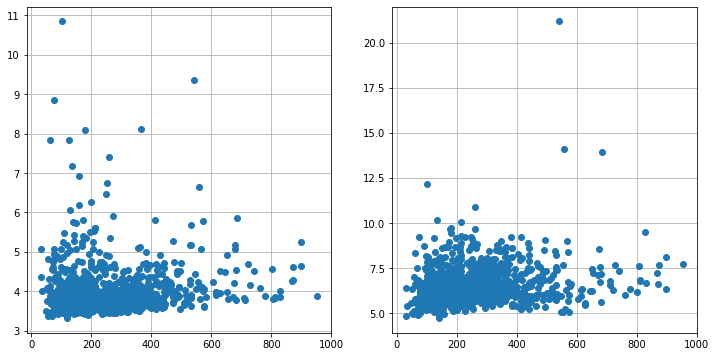

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data_num, data_11 / np.power(data_num, 1/3), 'o')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(data_num, data_12 / np.power(data_num, 1/3), 'o')
plt.grid()


In [53]:
q11 = sdst.cdist(x1, x1)
q12 = sdst.cdist(x1, x2)

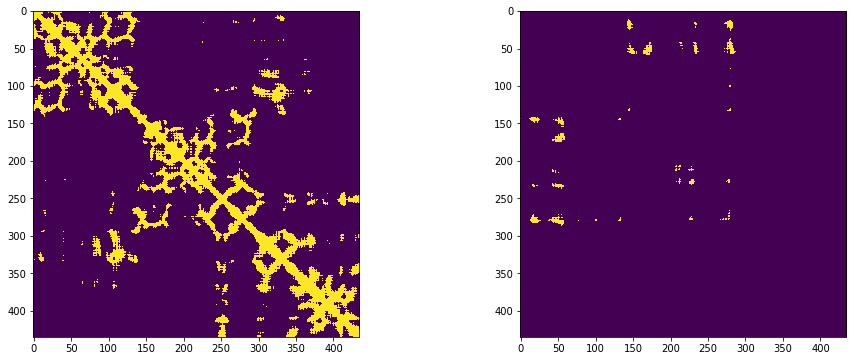

In [59]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(q11 < 16)
plt.subplot(1, 2, 2)
plt.imshow(q12 < 16)
